# K-means

Objetivo: Entender el concepto de clustering y aplicarlo en un dataset.

- Documentación: https://scikit-learn.org/stable/modules/clustering.html#k-means


K-means es un método de agrupamiento, cada observación pertenece al grupo donde la distancia a la media es menor, el objetivo es asignar un conjunto de $n$ observaciones a $k$ grupos, esto también es conocido como aprendizaje no supervisado.

- __Inicialización__
    - elegir $k$ posiciones aleatorias
    - asignar los centroides  $C = \{ c_1, \ldots, c_k \}$ a esas posiciones

- __Iteraración__

    - asignar cada $x_i$ al cluster que tenga la distancia mínima

     \begin{equation}
     \min_{c_k \in C} || x_i - c_k\ || ^2
     \end{equation}

    - actualizar centroides, moviando el centroide a la media de los puntos del cluster, donde $n_k$ es el número de elementos en el cluster $k$ :

         \begin{equation}
         c_k = \frac{1}{n_k} \sum_{i=1}^{n_k} x_{i}
         \end{equation}

    - hasta que exista convergencia






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('iris.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df = df.replace({'setosa':0, 'virginica':1, 'versicolor':2})
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Viisualizar separación de clases por variables

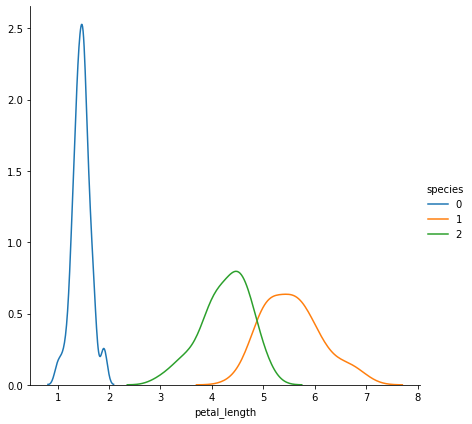

In [6]:
sns.FacetGrid(df, hue="species", height=6) \
   .map(sns.kdeplot, "petal_length") \
   .add_legend()

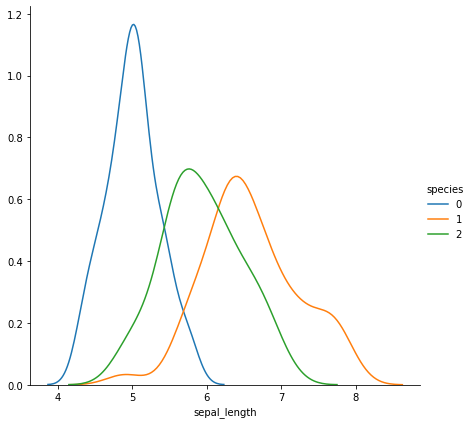

In [7]:
sns.FacetGrid(df, hue="species", height=6) \
   .map(sns.kdeplot, "sepal_length") \
   .add_legend()

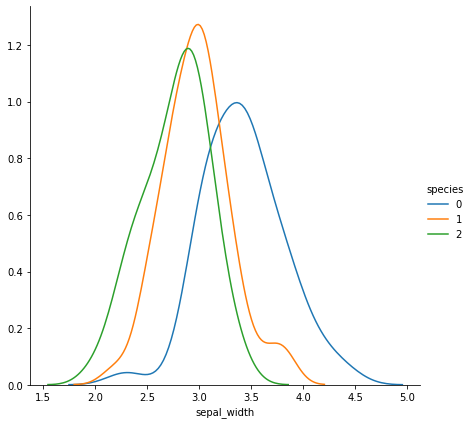

In [8]:
sns.FacetGrid(df, hue="species", height=6) \
   .map(sns.kdeplot, "sepal_width") \
   .add_legend()

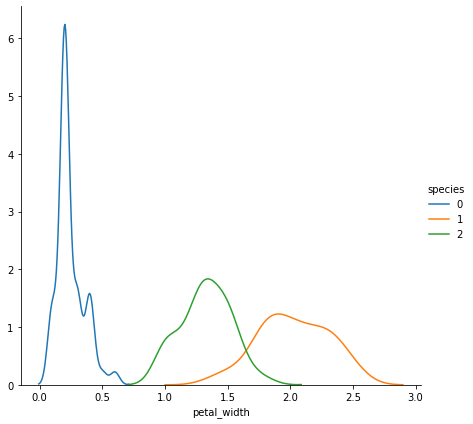

In [9]:
sns.FacetGrid(df, hue="species", height=6) \
   .map(sns.kdeplot, "petal_width") \
   .add_legend()

## K Means 


- Se asigna el parámetro 'K' que indica el número de clusters. También se puede asignar el número de iteraciones

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=3,verbose=0,tol=1e-3,max_iter=300,n_init=20,random_state=14)

In [12]:
kmeans.fit(df.drop('species',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=14, tol=0.001, verbose=0)

In [13]:
clus_cent=kmeans.cluster_centers_
clus_cent

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [14]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [15]:
df['species'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Adaptar para 'kmeans.labels_'

In [16]:
labels = df.replace({0:1, 1:0})
labels.species.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Comportamiento de etiquetas 'K-means'
- Se obtienen las predicciones, informe de clasificación y matriz de confusión.

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
print("Predicciones:\n")
print(kmeans.labels_) 
print("\nReporte de clasificación:\n")
print(classification_report(kmeans.labels_,labels.species.values))

Predicciones:

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.72      0.95      0.82        38
           1       1.00      1.00      1.00        50
           2       0.96      0.77      0.86        62

    accuracy                           0.89       150
   macro avg       0.89      0.91      0.89       150
weighted avg       0.91      0.89      0.89       150



In [18]:
print("Confusion matrix")
confusion_matrix(kmeans.labels_,labels.species.values)

Confusion matrix


array([[36,  0,  2],
       [ 0, 50,  0],
       [14,  0, 48]])

## Utilizando PCA para visualizar la clasificación de K-means

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(df.drop('species',axis=1))
y = kmeans.labels_
X_pca = pca.transform(df.drop('species',axis=1))
clus_cent=kmeans.cluster_centers_
cent = pca.transform(clus_cent)

## Ploteando centroides

<Figure size 720x432 with 0 Axes>

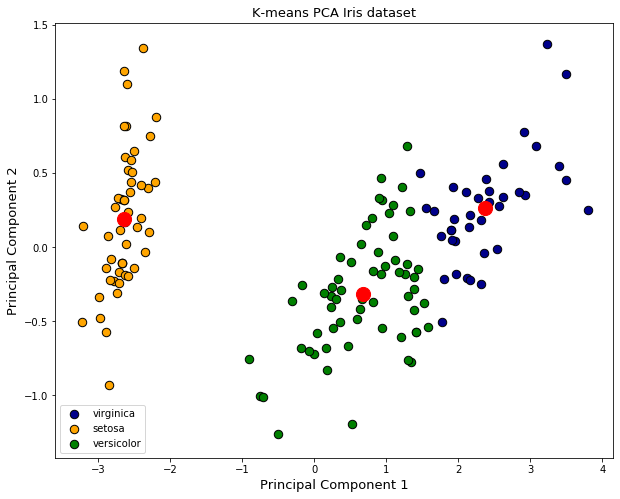

In [20]:
plt.figure(figsize=(10,6))
target_ids = np.unique(df.values[:,-1])
colors = ['darkblue','orange','green']
target_names = ['virginica', 'setosa','versicolor']


plt.figure(figsize=(10,8))
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_pca[i == y,0], X_pca[i == y,1], c = c,  edgecolors='black', s=285,label=label, marker='.')
plt.legend()
plt.scatter(cent[:,0], cent[:,1], s=200, color = 'red')
plt.title("K-means PCA Iris dataset",fontsize=13)
plt.xlabel("Principal Component 1",fontsize=13)
plt.ylabel("Principal Component 2",fontsize=13)
plt.show()

# Etiquetas originales

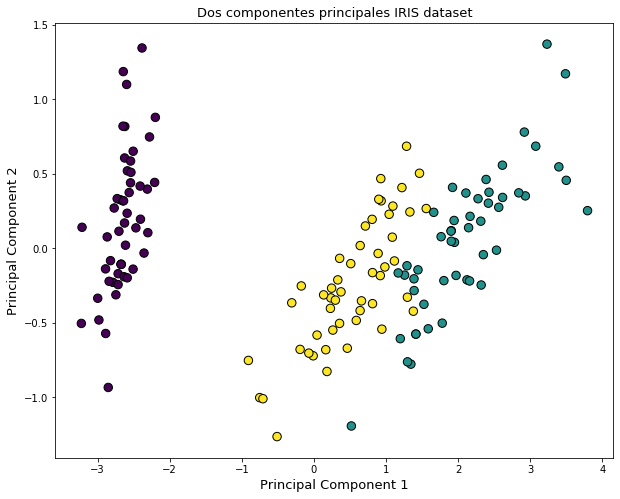

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(X_pca[:,0],X_pca[:,1],c=df['species'],edgecolors='black', s=285, marker = '.')
plt.title("Dos componentes principales IRIS dataset",fontsize=13)
plt.xlabel("Principal Component 1",fontsize=13)
plt.ylabel("Principal Component 2",fontsize=13)
plt.show()

## K-means con dataset de los ejercicios de clasificación
-  Visualizar dataset de clasificación
- Se crean dos grupos para tratar de separar de manera no-supervisada y visualizar el comportamiento del algoritmo
- Se escalan los datos con 'StandardScaler'

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
df = pd.read_csv("data-breast.csv",index_col=0)
df = df.replace({'B':0, 'M':1})
df.head()
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN


In [24]:
y_true = df['diagnosis']
X = df.drop(['diagnosis','Unnamed: 32'],axis=1)
X = scaler.fit_transform(X)
dfx = pd.DataFrame(data=X,columns=df.columns[1:31])

dfx.tail()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [25]:
kmeans = KMeans(n_clusters=2,max_iter=300,n_init=20, random_state=110)
kmeans.fit(dfx)
y = kmeans.labels_
pca = PCA(n_components=2).fit(dfx)
clus_cent_breast=kmeans.cluster_centers_
cent = pca.transform(clus_cent_breast)

In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(dfx)

In [27]:
df['diagnosis'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

## Comportamiento de etiquetas 'K-means'


In [28]:
print("Predicciones:\n")
print(kmeans.labels_) 
print("\nReporte de clasificación:\n")
print(classification_report(kmeans.labels_,df.diagnosis.values))

Predicciones:

[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1

In [29]:
print("Confusion matrix")
confusion_matrix(kmeans.labels_,df.diagnosis.values)

Confusion matrix


array([[343,  37],
       [ 14, 175]])

## K-means con PCA

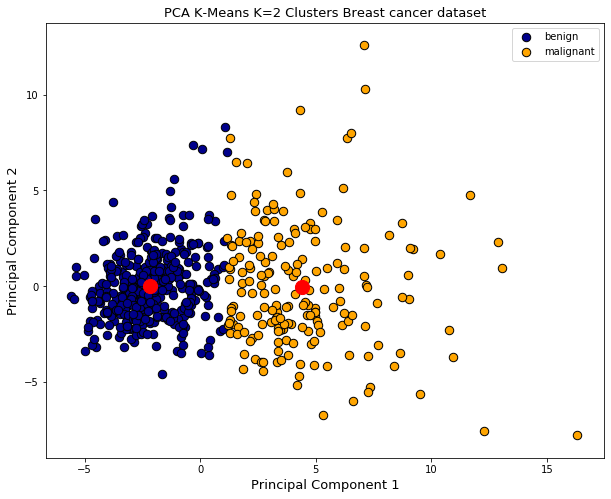

In [30]:
target_ids = np.unique(y)
plt.figure(figsize=(10,8))
colors = ['darkblue', 'orange']
target_names = ['benign','malignant']
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_pca[i == y,0], X_pca[i == y,1], c = c,  edgecolors='black', s=285,label=label, marker='.')
plt.legend()
plt.scatter(cent[:,0], cent[:,1], s=200, color = 'red')
plt.title('PCA K-Means K=2 Clusters Breast cancer dataset',fontsize=13)
plt.xlabel("Principal Component 1",fontsize=13)
plt.ylabel("Principal Component 2",fontsize=13)

plt.show()

## Etiquetas originales

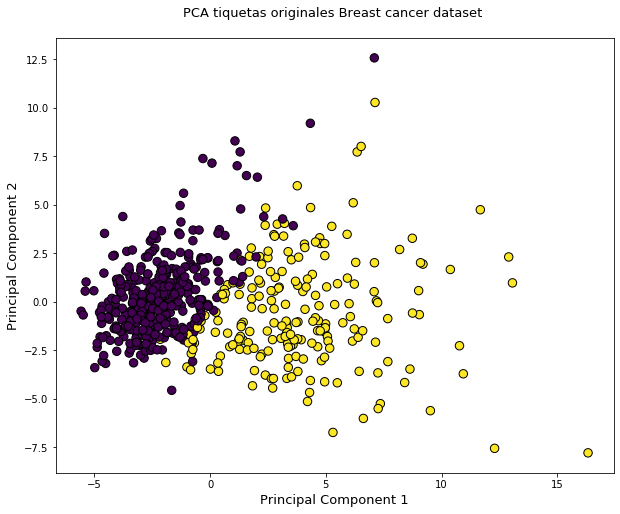

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_true, edgecolors='black', s=285,label=label, marker='.')
plt.title("PCA tiquetas originales Breast cancer dataset \n",fontsize=13)
plt.xlabel("Principal Component 1",fontsize=13)
plt.ylabel("Principal Component 2",fontsize=13)
plt.show()

## K = 3
- Ahora se crean 3 clases

In [32]:
kmeans = KMeans(n_clusters=3,max_iter=300,n_init=20, random_state=1221)
kmeans.fit(dfx)
y = kmeans.labels_
pca = PCA(n_components=2).fit(dfx)
clus_cent_breast=kmeans.cluster_centers_
cent = pca.transform(clus_cent_breast)

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(dfx)

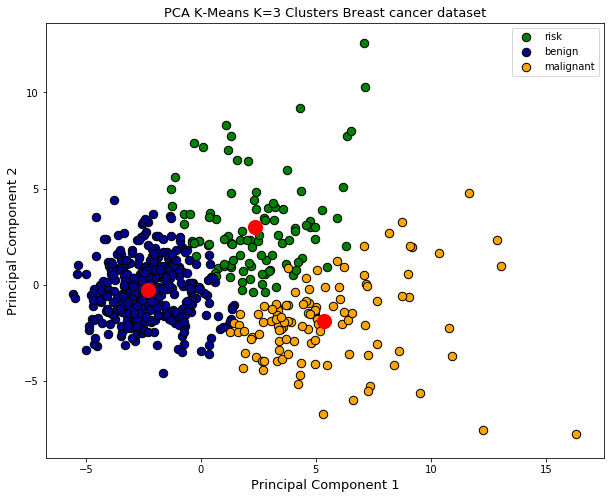

In [34]:
target_ids = np.unique(y)
plt.figure(figsize=(10,8))
colors = ['green','darkblue','orange']
target_names = ['risk','benign','malignant']
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_pca[i == y,0], X_pca[i == y,1], c = c,  edgecolors='black', s=285,label=label, marker='.')
plt.legend()
plt.scatter(cent[:,0], cent[:,1], s=200, color = 'red')
plt.title('PCA K-Means K=3 Clusters Breast cancer dataset',fontsize=13)
plt.xlabel("Principal Component 1",fontsize=13)
plt.ylabel("Principal Component 2",fontsize=13)

plt.show()

- Probar K-means con un diferente dataset
- Crear diferentes clusters